In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [3]:
data = pd.read_csv("IMDB Dataset.csv")

In [4]:
data.dropna(inplace=True)

In [5]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [6]:
data['review'] = data['review'].apply(clean_review)

In [7]:
#applying regix librrary to remove html data
import re
clean = re.compile('<.*?>')
re.sub(clean, '', data.iloc[2].review)

#function to clean html tags
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

data['review']= data['review'].apply(clean_html)

In [8]:
data['review'][12]

'im big fan Boll\'s work many are. enjoyed movie Postal (maybe im one). Boll apparently bought rights use Far Cry long ago even game even finsished. People enjoyed killing mercs infiltrating secret research labs located tropical island warned, Far Cry... something Mr Boll schemed together along legion schmucks.. Feeling loneley set Mr Boll invites three countrymen play with. players go names Til Schweiger, Udo Kier Ralf Moeller.Three names actually made selfs pretty big movie biz. tale goes like this, Jack Carver played Til Schweiger (yes Carver German hail bratwurst eating dudes!!) However find Tils acting movie pretty badass.. People complained he\'s really staying true whole Carver agenda saw carver first person perspective really know looked like kicking a**.. However, storyline film beyond demented. see evil mad scientist Dr. Krieger played Udo Kier, making Genetically-Mutated-soldiers GMS called. Performing top-secret research island reminds "SPOILER" Vancouver reason. Thats righ

In [9]:
#function to remove special characters

def remove_special(text):
    x=''
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x + ' '
    return x
data['review']= data['review'].apply(remove_special)

In [19]:
#wordcloud 

from wordcloud import WordCloud

In [18]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.6 MB/s eta 0:00:00


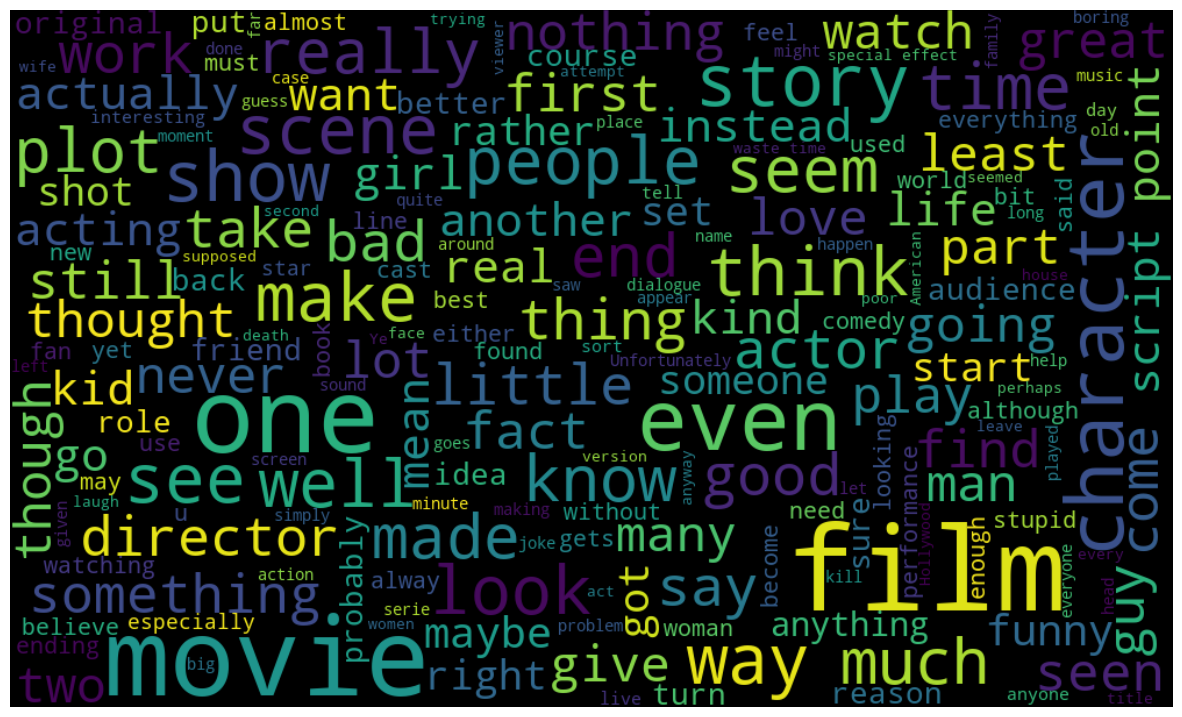

In [20]:
#draw Wordcloud
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

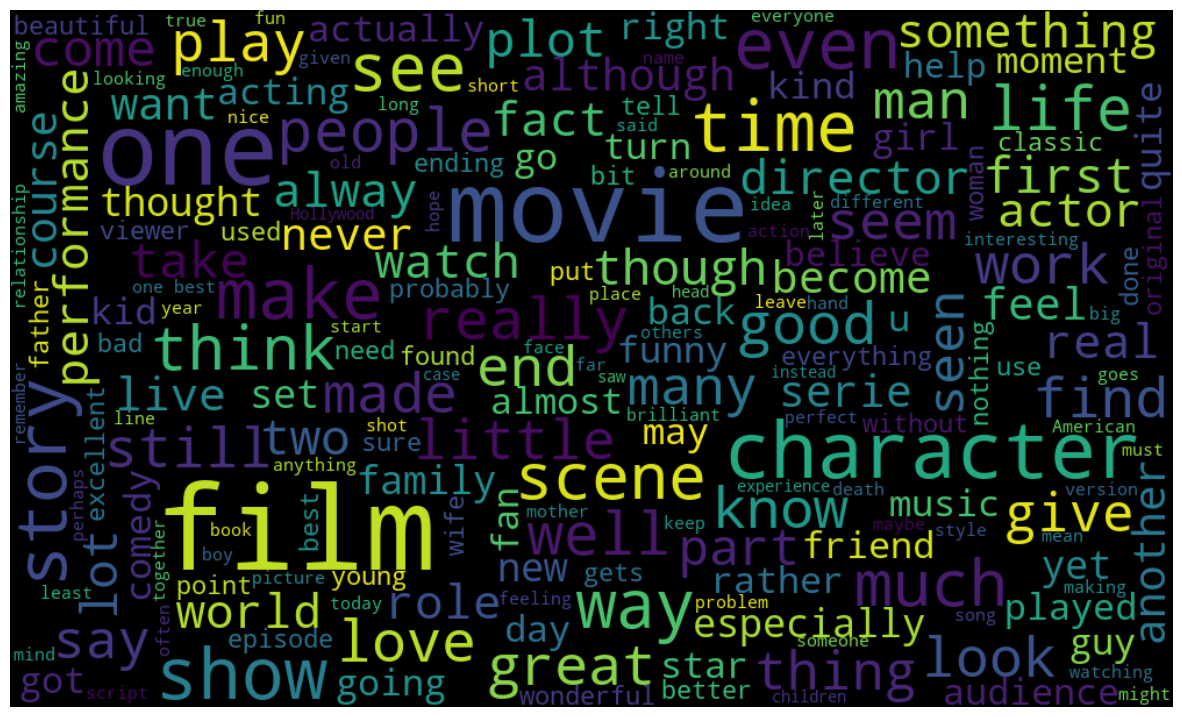

In [21]:
reviews = ' '.join(word for word in data['review'][data['sentiment']== 'positive'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [11]:
X=data.iloc[:,0:1].values
X.shape


(50000, 1)

In [12]:
reviews = cv.fit_transform(data['review']).toarray()


In [27]:
# Convert the TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(reviews, columns=cv.get_feature_names_out())

# View the TF-IDF features
print(tfidf_df)

       000        10  100   11   12   13   15        20  2001   25  ...  yet  \
0      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  ...  0.0   
1      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  ...  0.0   
2      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  ...  0.0   
3      0.0  0.089046  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  ...  0.0   
4      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  ...  0.0   
...    ...       ...  ...  ...  ...  ...  ...       ...   ...  ...  ...  ...   
49995  0.0  0.086535  0.0  0.0  0.0  0.0  0.0  0.132696   0.0  0.0  ...  0.0   
49996  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  ...  0.0   
49997  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  ...  0.0   
49998  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  ...  0.0   
49999  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   0.0  0.0  ...  0.0   

           york  you     young  younger

In [13]:
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])

In [14]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [19]:
sent_train.shape

(40000,)

In [20]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [21]:
predict = model.predict(reviews_test)

In [22]:
from sklearn.metrics import accuracy_score
print("logistic regression" ,accuracy_score(sent_test, predict))

logistic regression 0.8878


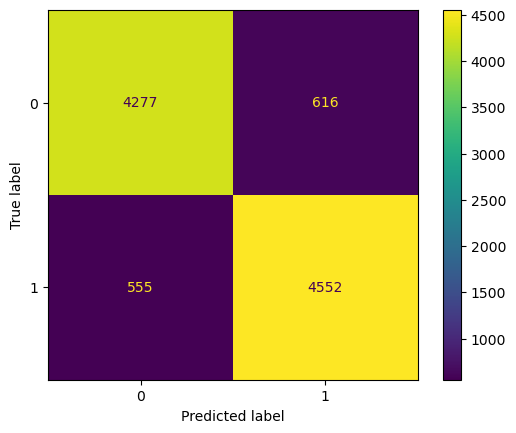

In [40]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [41]:
import pickle as pk

In [80]:
pk.dump(model,open('model.pkl','wb'))

In [81]:
pk.dump(cv,open('scaler.pkl','wb'))

In [82]:
filename = 'trained.sav'
pk.dump(model, open(filename, 'wb'))
loaded_model = pk.load(open('trained.sav','rb'))
cv = pk.load(open('scaler.pkl','rb'))

In [83]:
text = "amazing movie I absolutely loved it"
text= clean_review(text)
text= clean_html(text)

text = remove_special(text)


# Debugging: Print processed text
print("Processed Text:", text)
text_r=cv.transform([text]).toarray()
# Debugging: Print transformed text features
print("Transformed Text Features:", text_r)
prediction = loaded_model.predict(text_r)
print(prediction)
if(prediction[0]==0):
    print("negative")
else:
    print("positive")


Processed Text: amazing movie absolutely loved
Transformed Text Features: [[0. 0. 0. ... 0. 0. 0.]]
[1]
positive


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Calculate Metrics
precision = precision_score(sent_test, predict)
recall = recall_score(sent_test, predict)
f1 = f1_score(sent_test, predict)
accuracy = accuracy_score(sent_test, predict)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.8822
Recall: 0.8932
F1 Score: 0.8877
Accuracy: 0.8878


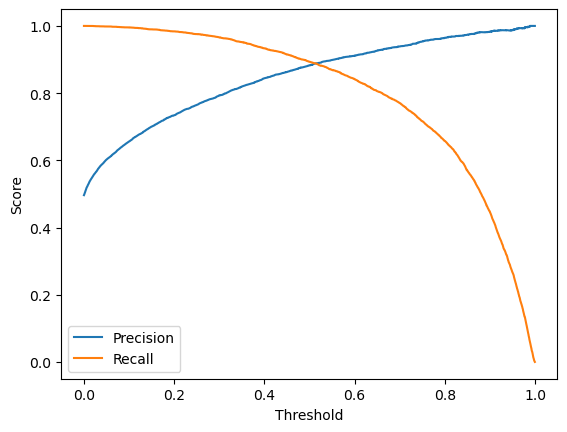

Optimal Threshold: 0.4410804290956092


In [26]:
# Predict probabilities instead of class labels
predicted_probabilities = model.predict_proba(reviews_test)

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(sent_test, predicted_probabilities[:, 1])

# Plot precision-recall curve
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

# Find optimal threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[f1_scores.argmax()]
print(f"Optimal Threshold: {optimal_threshold}")

In [28]:
# Get the feature names (words)
feature_names = cv.get_feature_names_out()

# Create a DataFrame to store the coefficients along with the words
coefficients_df = pd.DataFrame({'Word': feature_names, 'Coefficient': model.coef_[0]})

# Sort the DataFrame by coefficient values to identify important words
coefficients_df_sorted = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the top 4-5 words with the highest coefficients
print(coefficients_df_sorted.head(5))

           Word  Coefficient
972       great     6.716135
739   excellent     6.569726
1604    perfect     5.259648
97      amazing     5.202578
2459  wonderful     4.962974


In [29]:
print(coefficients_df_sorted.tail(5))

        Word  Coefficient
266   boring    -6.246814
191      bad    -7.068680
186    awful    -7.808748
2393   waste    -7.991346
2473   worst   -10.308138


In [30]:
intercept = model.intercept_
print("Intercept (Bias):", intercept)

Intercept (Bias): [-0.10974972]
